In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sed_scores_eval import collar_based, intersection_based, package_dir
from time import time

In [2]:
test_data_dir = package_dir / 'tests' / 'data'

In [3]:
dtc_threshold = .7
gtc_threshold = .7
cttc_threshold = None
alpha_ct = .0
alpha_st = 1.

# PSD-ROC computation using sed_scores_eval package

In [4]:
tic = time()
psds, psd_roc, single_class_psd_rocs = intersection_based.psds(
    scores=test_data_dir / "eval" / "scores",
    ground_truth=test_data_dir / "eval" / "ground_truth.tsv",
    audio_durations=test_data_dir / "eval" / "audio_durations.tsv", 
    dtc_threshold=dtc_threshold, gtc_threshold=gtc_threshold,
    cttc_threshold=cttc_threshold,
    alpha_ct=alpha_ct, alpha_st=alpha_st,
    unit_of_time='hour', max_efpr=100.,
)
etpr, efpr = psd_roc
time() - tic

10.256685733795166

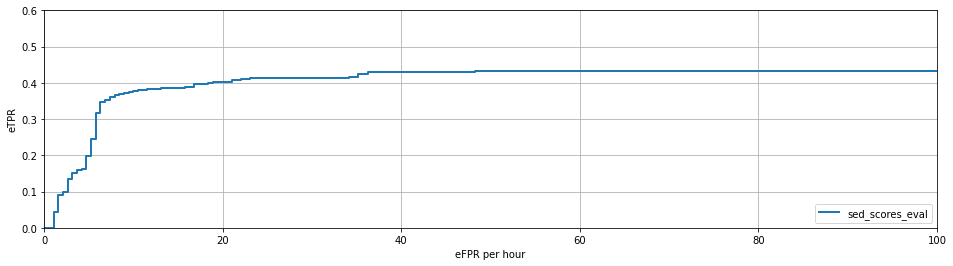

In [5]:
plt.figure(figsize=(16,4))
plt.ylim(.0,.6)
plt.xlim(0,100)
plt.grid()
plt.ylabel('eTPR')
plt.xlabel('eFPR per hour')
plt.step(efpr, etpr, lw=2)
plt.legend(['sed_scores_eval',], loc='lower right')

# PSD-ROC computation using psds_eval package without score transform

## 50 linearly spaced thresholds

In [6]:
thresholds=np.linspace(0.01, 0.99, 50)
tic = time()
(
    psds_approx, psd_roc_approx, single_class_psd_rocs_approx
) = intersection_based.reference.approximate_psds(
    scores=test_data_dir / "eval" / "scores",
    ground_truth=test_data_dir / "eval" / "ground_truth.tsv",
    audio_durations=test_data_dir / "eval" / "audio_durations.tsv", 
    thresholds=thresholds,
    dtc_threshold=dtc_threshold, gtc_threshold=gtc_threshold,
    cttc_threshold=cttc_threshold if alpha_ct > 0. else None,
    alpha_ct=alpha_ct, alpha_st=alpha_st,
    unit_of_time='hour', max_efpr=100.,
)
etpr_approx, efpr_approx = psd_roc_approx
time() - tic

34.019378900527954

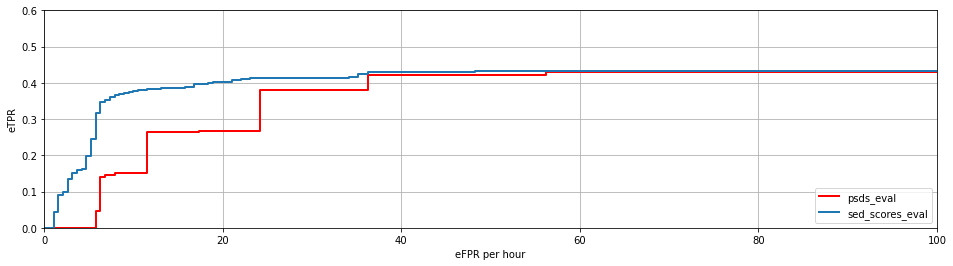

In [7]:
plt.figure(figsize=(16,4))
plt.ylim(.0,.6)
plt.xlim(0,100)
plt.grid()
plt.ylabel('eTPR')
plt.xlabel('eFPR per hour')
plt.step(efpr_approx, etpr_approx, 'r', lw=2)
plt.step(efpr, etpr, lw=2)
plt.legend([ 'psds_eval', 'sed_scores_eval',], loc='lower right')

## 500 linearly spaced thresholds

In [8]:
thresholds = np.linspace(0.001, 0.999, 500)
tic = time()
(
    psds_approx, psd_roc_approx, single_class_psd_rocs_approx
) = intersection_based.reference.approximate_psds(
    scores=test_data_dir / "eval" / "scores",
    ground_truth=test_data_dir / "eval" / "ground_truth.tsv",
    audio_durations=test_data_dir / "eval" / "audio_durations.tsv", 
    thresholds=thresholds,
    dtc_threshold=dtc_threshold, gtc_threshold=gtc_threshold,
    cttc_threshold=cttc_threshold if alpha_ct > 0. else None,
    alpha_ct=alpha_ct, alpha_st=alpha_st,
    unit_of_time='hour', max_efpr=100.,
)
etpr_approx, efpr_approx = psd_roc_approx
time() - tic

307.56237626075745

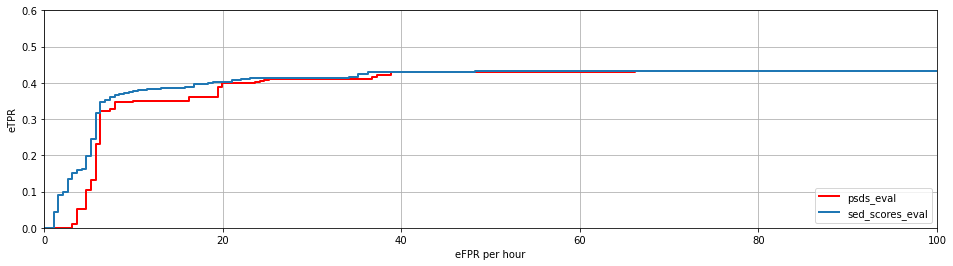

In [9]:
plt.figure(figsize=(16,4))
plt.ylim(.0,.6)
plt.xlim(0,100)
plt.grid()
plt.ylabel('eTPR')
plt.xlabel('eFPR per hour')
plt.step(efpr_approx, etpr_approx, 'r', lw=2)
plt.step(efpr, etpr, lw=2)
plt.legend([ 'psds_eval', 'sed_scores_eval',], loc='lower right')

# PSD-ROC computation using psds_eval package with score transform

In [10]:
from sed_scores_eval.base_modules.io import write_score_transform
write_score_transform(
    scores=test_data_dir / 'validation' / "scores",
    ground_truth=test_data_dir / 'validation' / "ground_truth.tsv",
    filepath=test_data_dir / 'validation' / 'score_transform.tsv'
)

## 50 linearly spaced thresholds

In [11]:
thresholds = np.linspace(0.01, 0.99, 50)
tic = time()
(
    psds_approx, psd_roc_approx, single_class_psd_rocs_approx
) = intersection_based.reference.approximate_psds(
    scores=test_data_dir / "eval" / "scores",
    ground_truth=test_data_dir / "eval" / "ground_truth.tsv",
    audio_durations=test_data_dir / "eval" / "audio_durations.tsv", 
    thresholds=thresholds,
    dtc_threshold=dtc_threshold, gtc_threshold=gtc_threshold,
    cttc_threshold=cttc_threshold if alpha_ct > 0. else None,
    alpha_ct=alpha_ct, alpha_st=alpha_st,
    unit_of_time='hour', max_efpr=100.,
    score_transform=test_data_dir / 'validation' / 'score_transform.tsv',
)
etpr_approx, efpr_approx = psd_roc_approx
time() - tic

35.143150091171265

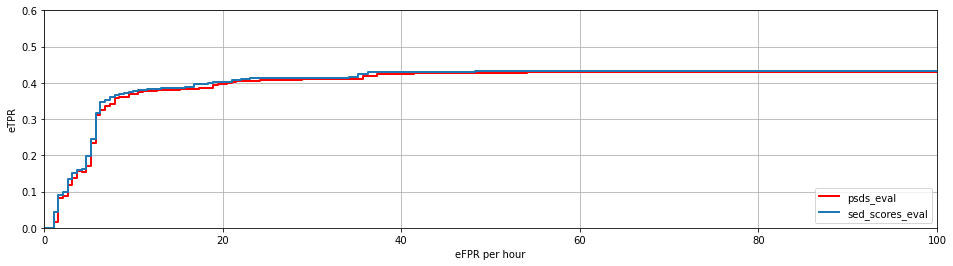

In [12]:
plt.figure(figsize=(16,4))
plt.ylim(.0,.6)
plt.xlim(0,100)
plt.grid()
plt.ylabel('eTPR')
plt.xlabel('eFPR per hour')
plt.step(efpr_approx, etpr_approx, 'r', lw=2)
plt.step(efpr, etpr, lw=2)
plt.legend([ 'psds_eval', 'sed_scores_eval',], loc='lower right')

## 500 linearly spaced thresholds

In [13]:
thresholds = np.linspace(0.001, 0.999, 500)
tic = time()
(
    psds_approx, psd_roc_approx, single_class_psd_rocs_approx
) = intersection_based.reference.approximate_psds(
    scores=test_data_dir / "eval" / "scores",
    ground_truth=test_data_dir / "eval" / "ground_truth.tsv",
    audio_durations=test_data_dir / "eval" / "audio_durations.tsv", 
    thresholds=thresholds,
    dtc_threshold=dtc_threshold, gtc_threshold=gtc_threshold,
    cttc_threshold=cttc_threshold if alpha_ct > 0. else None,
    alpha_ct=alpha_ct, alpha_st=alpha_st,
    unit_of_time='hour', max_efpr=100.,
    score_transform=test_data_dir / 'validation' / 'score_transform.tsv',
)
etpr_approx, efpr_approx = psd_roc_approx
time() - tic

303.0713121891022

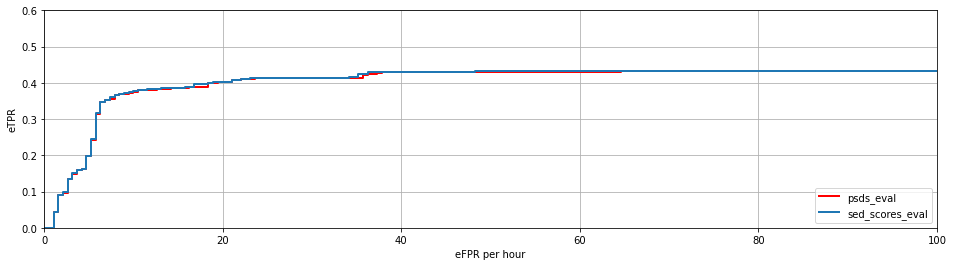

In [14]:
plt.figure(figsize=(16,4))
plt.ylim(.0,.6)
plt.xlim(0,100)
plt.grid()
plt.ylabel('eTPR')
plt.xlabel('eFPR per hour')
plt.step(efpr_approx, etpr_approx, 'r', lw=2)
plt.step(efpr, etpr, lw=2)
plt.legend([ 'psds_eval', 'sed_scores_eval',], loc='lower right')